# Steps
- Grab Data from http://worldwater.org/wp-content/uploads/2013/07/ww8-table2.pdf
- Grab Data from http://worldwater.org/wp-content/uploads/2013/07/ww8-table1.pdf
- Store in respective csv files

In [55]:
import PyPDF2
import requests
import pandas as pd
import matplotlib.pyplot as plt
API_KEY = 'a6qm46dcocrv' # leveraging https://pdftables.com/pdf-to-excel-api

In [16]:
import os
directory = os.path.dirname('/data')
if not os.path.exists(directory):
    os.makedirs(directory)

In [43]:
def pdfScrapeTable(PDFfilename, tablePages, rotatePages, rotateAngle, outputPDFfilename):
    pfr = PyPDF2.PdfFileReader(open(PDFfilename,"rb"))
    writer = PyPDF2.PdfFileWriter()
    for p in tablePages:
        page = pfr.getPage(p)
        if p in rotatePages:
            page.rotateClockwise(rotateAngle)
        writer.addPage(page)
    with open(outputPDFfilename, "wb") as ouputStream:
        writer.write(ouputStream)

In [19]:
def pdfToTable(PDFfilename, apiKey, fileExt, downloadDir):
    fileData = (PDFfilename, open(PDFfilename, 'rb'))
    files = {'f': fileData}
    postUrl = "https://pdftables.com/api?key={0}&format={1}".format(apiKey, fileExt)
    response = requests.post(postUrl, files=files)
    response.raise_for_status()
    with open(downloadDir, "wb") as f:
        f.write(response.content)

# Get The Data from Water.org

In [41]:
# Define the pdfs here and the pages that contain tables
pdfToConvert = [
    {
        'url': 'http://worldwater.org/wp-content/uploads/2013/07/ww8-table1.pdf',
        'file_name': 'ww8-table1.pdf',
        'rotate_pages': [],
        'rotate_angle': 90,
        'table_pages': [2, 3, 4, 5],
    },
    {
        'url': 'http://worldwater.org/wp-content/uploads/2013/07/ww8-table2.pdf',
        'file_name': 'ww8-table2.pdf',
        'rotate_pages': [2, 3, 4, 5, 6, 7, 8],
        'rotate_angle': 90,
        'table_pages': [2, 3, 4, 5, 6, 7, 8],
    }
]

In [42]:
for f in pdfToConvert:
    # get the pdf from the URL 
    response = requests.get(f['url'])
    with open(f['file_name'], 'wb') as file:
        file.write(response.content)
        
    # scrape the table data and output to respective csv's
    scrapedTablePDF = f['file_name'].split('.')[0] + '_scrape.pdf'
    outputCSV = f['file_name'].split('.')[0] + '.csv'
    pdfScrapeTable(f['file_name'], f['table_pages'], f['rotate_pages'], f['rotate_angle'], scrapedTablePDF)
    pdfToTable(scrapedTablePDF, apiKey=API_KEY, fileExt='csv', downloadDir=outputCSV)

ww8-table1.pdf [2, 3, 4, 5] [] 90
ww8-table2.pdf [2, 3, 4, 5, 6, 7, 8] [2, 3, 4, 5, 6, 7, 8] 90
called rotate
called rotate
called rotate
called rotate
called rotate
called rotate
called rotate


# Clean The Data
- going to cheet for now and edit in Excel as this will only take me a few minutes

# Play w Data To See What Pops Out

In [75]:
tbl1 = pd.read_csv('ww8-table1_clean.csv')
tbl1.set_index('Country', inplace=True)
tbl2 = pd.read_csv('ww8-table2_clean.csv')
tbl2.set_index('Country', inplace=True)

In [117]:
tbl1.head()

,Region,Annual Renewal Water Resources (km 3/yr),Year of Estimate,Source of
Country,,,,
Algeria,AFRICA,11.6,2005.0,c
Angola,AFRICA,148.0,2011.0,i
Benin,AFRICA,25.8,2001.0,j
Botswana,AFRICA,12.2,2011.0,i
Burkina Faso,AFRICA,12.5,2011.0,i


In [76]:
tbl1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, Algeria to Timor-Leste
Data columns (total 4 columns):
Region                                      178 non-null object
Annual Renewal Water Resources (km 3/yr)    176 non-null float64
Year of Estimate                            176 non-null float64
Source of                                   176 non-null object
dtypes: float64(2), object(2)
memory usage: 7.0+ KB


In [61]:
tbl1.describe()

,Annual Renewal Water Resources (km 3/yr),Year of Estimate
count,176.000000,176.000000
mean,305.246250,2003.795455
std,850.637367,6.913604
min,0.000000,1975.000000
25%,12.500000,2000.000000
50%,57.650000,2005.000000
75%,186.725000,2008.000000
max,8233.000000,2013.000000


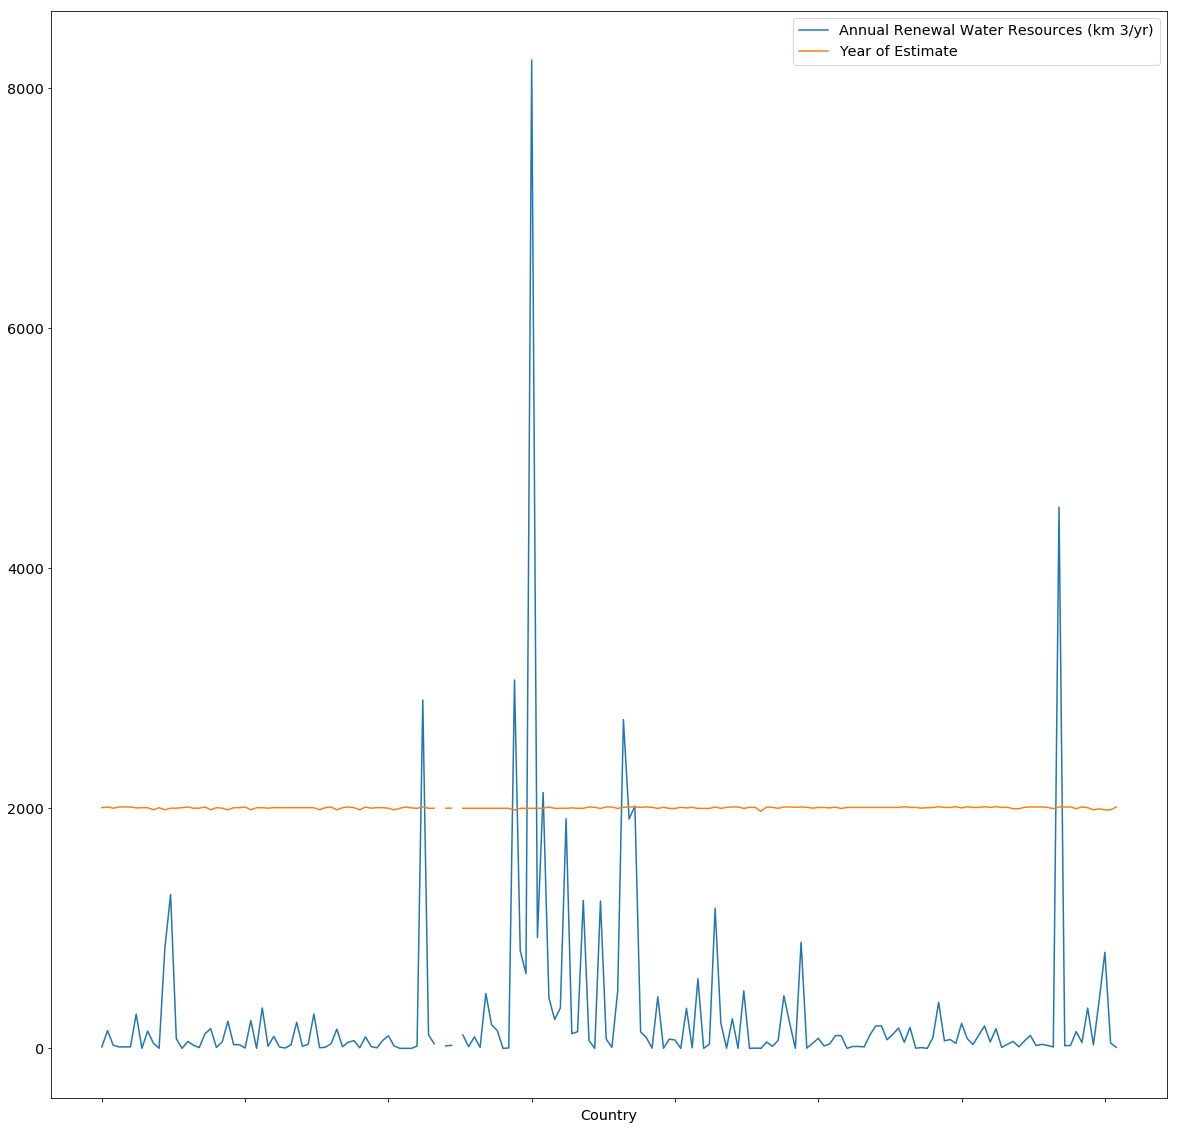

In [118]:
tbl1.plot()
plt.show()

In [79]:
tbl2.head()

,Region,Year,Total Freshwater Withdrawal (km 3/yr),Per Capita Withdrawal (m 3/p/yr),Domestic Use (%),Industrial Use (%),Agricultural Use (%),Domestic Use m3/p/yr,Industrial Use (m3/p/yr),Agricultural Use (m3/p/yr),Source,2010 Population (millions)
Country,,,,,,,,,,,,
Algeria,AFRICA,2001,5.70,161,24,15,61,39.0,24.0,98.0,f,35.42
Angola,AFRICA,2005,0.70,37,45,34,21,17.0,13.0,8.0,f,18.99
Benin,AFRICA,2001,0.13,14,32,23,45,5.0,3.0,6.0,f,9.21
Botswana,AFRICA,2000,0.19,96,41,18,41,39.0,17.0,39.0,f,1.98
Burkina Faso,AFRICA,2001,0.72,44,39,2,59,17.0,1.0,26.0,f,16.29


In [65]:
tbl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 13 columns):
Region                                   174 non-null object
Country                                  174 non-null object
Year                                     174 non-null int64
Total Freshwater Withdrawal (km 3/yr)    173 non-null float64
Per Capita Withdrawal (m 3/p/yr)         173 non-null object
Domestic Use (%)                         169 non-null object
Industrial Use (%)                       169 non-null object
Agricultural Use (%)                     169 non-null object
Domestic Use m3/p/yr                     169 non-null float64
Industrial Use (m3/p/yr)                 169 non-null float64
Agricultural Use (m3/p/yr)               169 non-null float64
Source                                   173 non-null object
2010 Population (millions)               174 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 17.8+ KB


In [66]:
tbl2.describe()

,Year,Total Freshwater Withdrawal (km 3/yr),Domestic Use m3/p/yr,Industrial Use (m3/p/yr),Agricultural Use (m3/p/yr)
count,174.000000,173.000000,169.000000,169.000000,169.000000
mean,2003.344828,22.805746,67.514793,95.538462,326.408284
std,4.127527,83.141938,63.209318,176.399304,548.290204
min,1975.000000,0.006000,0.000000,0.000000,0.000000
25%,2000.000000,0.540000,20.000000,5.000000,26.000000
50%,2004.000000,2.200000,54.000000,22.000000,134.000000
75%,2006.000000,12.210000,92.000000,88.000000,439.000000
max,2010.000000,761.000000,445.000000,1304.000000,5085.000000


,Total Freshwater Withdrawal (km 3/yr)
Country,
Algeria,5.70
Angola,0.70
Benin,0.13
Botswana,0.19
Burkina Faso,0.72
Burundi,0.29
Cameroon,0.97
Cape Verde,0.02
Central African Republic,0.07


In [141]:
tbl3 = tbl1.join(tbl2[['Total Freshwater Withdrawal (km 3/yr)']], on='Country', how='inner', lsuffix='_left', rsuffix='_right')
tbl3 = tbl3[['Region','Annual Renewal Water Resources (km 3/yr)','Total Freshwater Withdrawal (km 3/yr)']]
tbl3.head()

,Region,Annual Renewal Water Resources (km 3/yr),Total Freshwater Withdrawal (km 3/yr)
Country,,,
Algeria,AFRICA,11.6,5.70
Angola,AFRICA,148.0,0.70
Benin,AFRICA,25.8,0.13
Botswana,AFRICA,12.2,0.19
Burkina Faso,AFRICA,12.5,0.72


In [144]:
tbl3.columns = ['region', 'renewed_water', 'used_water']
total_renewed_water = tbl3['renewed_water'].sum()
total_used_water = tbl3['used_water'].sum()

print('The world is fudged becuase we use %.2f km 3/yr water and only replenish %.2f km 3/yr)' % (total_used_water, total_renewed_water))

The world is fudged becuase we use 3819.33 km 3/yr water and only replenish 46543.02 km 3/yr)


In [148]:
tbl3['usage_delta'] = tbl3['renewed_water']-tbl3['used_water']

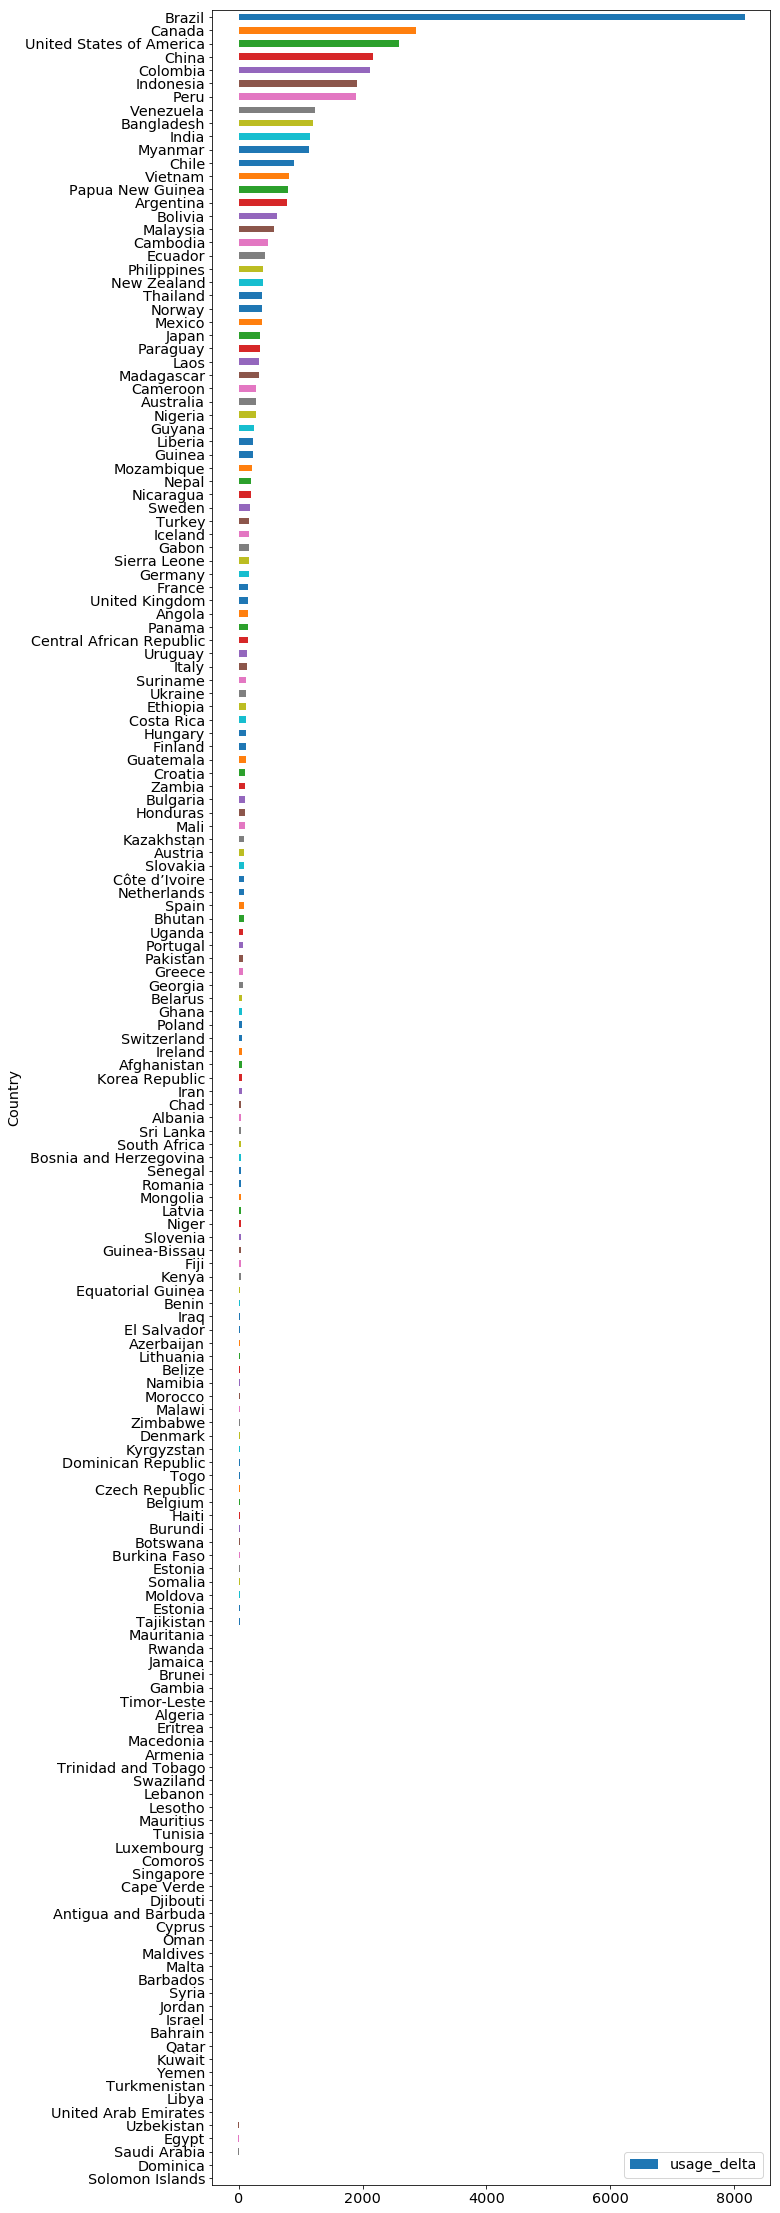

In [154]:
tbl3.sort_values('usage_delta',ascending=False).plot(figsize=(10,40), kind='barh', y='usage_delta')
plt.gca().invert_yaxis()

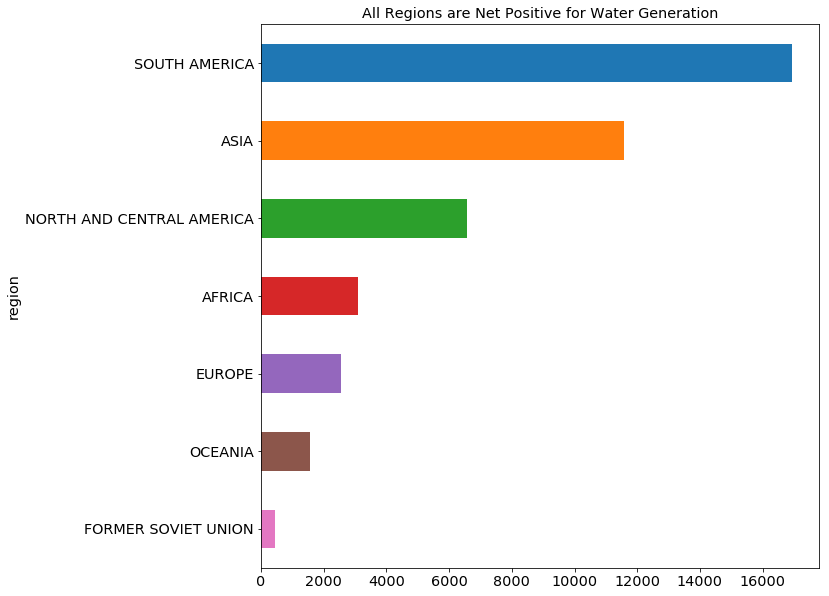

In [160]:
tbl4 = tbl3.groupby('region').sum()['renewed_water'] - tbl3.groupby('region').sum()['used_water']
tbl4.sort_values(ascending=False).plot(figsize=(10,10), title='All Regions are Net Positive for Water Generation', kind='barh')
plt.gca().invert_yaxis()